# Table of Contents

[Overview](#Overview)
<br>
[Step 1: Clean and Prepare the Data](#Step-1:-Clean-and-Prepare-the-Data)
<br>
[Step 2: Build Models](#Step-2:-Build-Models)
<br>
[Step 2a: Logistic Regression](#Step-2a:-Logistic-Regression)
<br>
[Step 2b: XGBoost](#Step-2b:-XGBoost)
<br>
[Step 3: Generate Predictions](#Step-3:-Generate-Predictions)
<br>
[Step 4: Compare Modeling Approaches](#Step-4:-Compare-Modeling-Approaches)

# Overview

This document contains analysis of the Pre-employment Assessment in support of Jacob Casey's application for the position of Data Scientist with State Farm.

# Step 1: Clean and Prepare the Data

First, here are all of the packages that I used for this analysis.

In [1]:
%matplotlib inline

import pandas as pd
from pandas.api.types import is_numeric_dtype
from scipy import stats
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor    
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

Now, let's important the data and take a quick overview of what we are working with.

In [2]:
train_df_original = pd.read_csv(r'D:\exercise_20_train.csv')
test_df_original = pd.read_csv(r'D:\exercise_20_test.csv')

train_df = train_df_original.copy()
test_df = test_df_original.copy()

In [3]:
pd.set_option("display.max_rows", 20, "display.max_columns", None)

In [4]:
train_df.head()

x0         x1         x2         x3         x4         x5        x6  \
0  0.963686   6.627185 -45.224008   9.477531  -3.216532  13.216874  9.754747   
1 -1.770062 -23.610459  -0.964003 -31.981497 -10.294599 -10.240251 -1.518888   
2  9.962401  -8.349849  23.248891 -24.196879   8.937480  10.965000 -7.490596   
3 -5.780709 -25.261584   1.383115 -11.786929   7.993078 -11.245752 -2.607351   
4  1.211541   1.119963   7.512938  21.987312  -5.155392  10.339416  3.045180   

         x7        x8        x9        x10        x11        x12       x13  \
0  5.245851 -1.102918 -2.867482 -37.632285 -12.983484 -30.244259  0.293407   
1 -1.675208  0.498134 -0.614390  47.652135   6.567264 -30.410216 -1.301751   
2 -3.025094  0.595807  0.382732   5.629537   3.769767  17.623199 -0.396468   
3 -3.513896 -0.614235 -1.453979  -2.636676  -3.595789 -19.648688  0.393391   
4 -0.619230 -0.928068  0.405024 -16.683612   6.534574 -39.182061 -0.424392   

         x14       x15        x16       x17        x18       x19        x20  \
0  -4.808540  9.293345   1.646353  5.687031 -14.049164 -1.158595 -20.776226   
1  -6.042590  1.817864   4.379207  5.676816 -37.757544  2.164646  59.052864   
2 -10.022546  1.158419  12.353464  0.398796  -0.201112 -5.803935   7.104037   
3  -3.470142  0.102685  -0.882429 -1.598535  12.869959  5.374145  30.723272   
4   1.372472 -0.962540   0.269750 -0.303965  -9.051790  2.298528  -5.081549   

        x21        x22        x23       x24       x25       x26        x27  \
0 -0.789881 -39.396519   1.235763 -5.403411 -0.012328  0.703963 -22.946374   
1 -1.480575 -35.736992  -8.580044  4.206910  0.732038 -1.109053  15.986872   
2  2.393360 -30.622601 -12.318385 -6.341881 -0.055468 -1.176393 -13.288725   
3  4.541173 -59.270400  -0.101281  4.451334  0.650121 -1.154275 -19.434740   
4  1.782286  -5.537197  -0.048488  0.450021  0.121331 -0.677065  28.398174   

        x28       x29       x30        x31        x32       x33         x34  \
0  0.114717 -1.108137 -7.513845   1.278470  -3.606321  1.615670   chrystler   
1 -0.534066  5.795439 -2.556791   2.990327  -1.603091  0.633938  volkswagon   
2 -0.383693  0.122918 -4.791641 -10.250248   5.837668 -3.756878         bmw   
3  1.471404  9.678197  4.149206  -2.814893 -10.966831  6.516250      nissan   
4  0.108270 -0.159321 -9.267869  -2.649007   3.523005  2.563282  volkswagon   

       x35       x36       x37       x38        x39       x40       x41  \
0     thur -1.774488  8.804852  2.136329   2.501032 -6.011242  $-865.28   
1     thur  0.040507  6.645667  3.205207   3.567783  5.405315   $325.27   
2  thurday  0.448073 -2.639292 -1.940933 -11.196415 -7.971329   $743.91   
3  thurday -0.625046  1.918934  1.046202  -6.727565  8.522306   $538.48   
4      wed -0.739334 -2.391980  0.749308  -2.578158  8.913248  $-433.65   

         x42        x43        x44     x45        x46        x47        x48  \
0 -32.366234 -27.950057  -5.662614   0.02%  -4.820389  26.350661 -17.522879   
1 -58.117719 -49.488582 -50.291610  -0.01%   1.003284  10.761073 -16.411092   
2 -47.325525  17.089850 -20.998601    0.0%   1.270592  20.947667  -1.198462   
3 -36.489186   3.120606 -31.523483   0.01%  12.551744   0.908244  -8.868663   
4   6.565492  57.017497 -10.305713    0.0%   4.702195 -12.990512 -19.747493   

         x49        x50        x51       x52       x53        x54        x55  \
0  14.420626 -68.076453 -47.173300  0.954900 -3.708620   4.131492   8.424414   
1   2.474421 -24.002610   7.760549 -0.167079 -5.148356   8.422932   2.882336   
2  -1.228983 -16.860396  62.630162 -0.520845 -0.484470 -16.271894 -11.448579   
3 -37.101607  40.757401 -22.994817  0.532649  4.227293   6.650745  -0.398449   
4  18.162754 -37.037823 -23.123480 -1.486823  1.581351  -0.156639  12.030379   

         x56       x57        x58        x59        x60        x61        x62  \
0  42.155760 -0.772753 -40.332336   4.748333  -9.002899   7.083087 -12.264477   
1  47.178502 -0.166740 -36.199657  -0.231633  -2.334688  -4.212509   1.

In [5]:
test_df.head()

x0         x1         x2         x3         x4         x5        x6  \
0   0.519093  -4.606038  13.707586 -17.990903  12.873394  14.910935  2.915341   
1 -12.357004  13.874141  14.052924  34.129247  34.511107  34.583336 -0.482540   
2   1.834922   2.665252 -44.873210  21.941920  10.102981   5.962249 -5.733909   
3  20.972483  11.548506 -40.924625 -35.296796 -35.253101 -14.601890  5.045075   
4  -9.916044   5.509811  31.749288  -0.803916  -4.005098  20.912490  0.419346   

          x7        x8        x9        x10        x11        x12       x13  \
0 -10.110081  1.628317 -0.365064  10.646442   3.922680  34.998362  2.433472   
1  -6.583407 -4.326799 -1.216928  -5.709141   6.175520   2.121554  1.578756   
2  -4.061670 -0.172269  0.096051  22.315785   3.330807  -8.121101 -1.985411   
3  10.841771 -1.872260 -0.002583  60.212310 -11.716837 -17.011739 -1.363757   
4  -2.949516  1.057176 -0.338547  25.056651   3.103853  -7.541111  1.521165   

         x14       x15       x16       x17        x18        x19        x20  \
0  -3.858548  0.104192 -5.519994  3.467700  31.000121  -4.590834   0.086110   
1   2.038905 -5.592737 -2.158564  0.521756  37.805522   1.901376  37.967075   
2   6.428962 -2.646925  8.367280 -5.545219   5.879821  10.221974  -9.095619   
3   2.843387 -0.390018 -0.504431 -0.001356 -45.845038  -2.662568  -0.540813   
4  12.184929 -2.534174  2.732948  3.906203  -6.551110  -2.489374   8.318352   

         x21        x22       x23       x24       x25       x26        x27  \
0   6.255197   4.697129  2.180207  7.108676 -0.908606 -0.515504  45.331378   
1   4.546150   8.383848  9.278303 -7.514222 -1.407846 -0.761477 -18.080597   
2  -1.368356 -39.691225  5.286057  0.562340  0.016971  1.894738  10.513043   
3  11.362248 -19.387491 -2.160935  3.217326 -0.456019  0.762841 -33.240271   
4   2.012928   2.698287  8.943937 -2.595725  0.148272  0.672342 -24.317962   

        x28       x29        x30       x31       x32       x33         x34  \
0  1.637379 -9.039186  -0.790305  2.265819 -4.036708  6.636670         bmw   
1  0.510580  4.201491  -0.544123  1.078374  2.652454  1.915220       tesla   
2  1.026482 -7.617738   9.442215  2.980519  3.070543 -1.370332       Honda   
3 -1.254007 -4.757926  -2.848993  3.598553 -1.466811 -6.091896  volkswagon   
4 -0.897424 -6.902125 -11.206673 -1.611313 -0.503040  7.663023  volkswagon   

       x35       x36       x37       x38        x39        x40        x41  \
0  thurday  0.220489 -1.358649  2.930821  -6.678993  43.244917    $107.93   
1  thurday  0.874948  2.237308 -2.800175  -2.606274  -2.164761   $-600.43   
2  thurday -1.454560 -3.010714  1.356234   9.807104   2.126665    $103.08   
3  thurday -0.387709  1.472792  2.963676 -11.401523 -10.641658   $1518.78   
4  thurday  0.340081 -3.284034  3.318112  -1.255465  21.673715  $-2324.39   

         x42        x43        x44     x45       x46        x47        x48  \
0  -3.146405  -1.022139 -18.489007    0.0% -0.614079 -26.472416 -12.610643   
1  52.113208  17.110573 -23.342708   0.02% -6.399984  -7.405831 -10.343896   
2 -26.994659 -35.031274 -48.063859   -0.0%  2.881744  -3.667737  -2.689463   
3 -68.793716   3.748340  30.820518  -0.01% -2.744012 -13.942982 -13.636830   
4  22.806935  71.614731  64.771537   -0.0%  1.378617  16.284572  11.350382   

         x49        x50        x51       x52       x53       x54       x55  \
0 -23.713968  11.879546   7.963185  2.183789  0.821193  4.918949  3.594825   
1  24.023963  -5.254145  25.897953 -0.658877  2.511540  0.195778 -5.103109   
2 -24.241777  33.275643 -30.165712 -1.143288  0.469528 -0.721423  3.937095   
3  12.031190  -1.651573  59.269683  0.395016 -0.367435  4.310019  7.280113   
4 -48.006294  55.869889  23.877340  0.265281 -2.567137 -3.950127 -2.567747   

         x56       x57        x58       x59        x60        x61        x62  \
0  30.639892  0.132310  45.348605  1.072083  -4.914587 -14.550192  -5.232047   
1 -10.249778 -0.807787  21.351741  2.842510  -0.187795   1.657564 -12.8635

In [6]:
train_df.describe()

x0            x1            x2            x3            x4  \
count  39988.000000  39990.000000  39993.000000  39987.000000  39993.000000   
mean       2.020255     -3.924559      1.006619     -1.378330      0.070199   
std        9.590599     18.768656     21.062970     29.397779     20.243287   
min      -36.842503    -79.156374    -89.728356   -126.652341    -76.412886   
25%       -4.461433    -16.591552    -13.230956    -21.297149    -13.580632   
50%        2.022412     -4.061703      1.184946     -1.224625      0.091600   
75%        8.389979      8.529110     15.221205     18.530623     13.722427   
max       44.478690     77.682652     84.625640    117.004453     85.934044   

                 x5            x6            x7            x8            x9  \
count  39992.000000  39991.000000  39990.000000  39994.000000  39993.000000   
mean      -0.715213     -0.002706     -0.025689     -0.354808     -0.017024   
std       18.268807      6.789876      5.600785      1.598967      1.346529   
min      -73.743342    -26.354840    -21.541786     -6.567005     -5.278747   
25%      -13.092873     -4.611958     -3.803039     -1.423225     -0.918678   
50%       -0.657601      0.005821     -0.002787     -0.355350     -0.029236   
75%       11.610239      4.519461      3.739330      0.717467      0.886102   
max       74.465465     33.866723     27.609576      8.180336      5.179831   

                x10           x11           x12           x13           x14  \
count  39993.000000  39991.000000  39989.000000  39985.000000  39995.000000   
mean       6.665975      0.034923     -5.970745      0.000768      0.000059   
std       35.801754      6.860888     24.362354      1.878066      7.653960   
min     -150.796197    -27.113879   -105.744748     -7.996824    -31.509585   
25%      -17.309763     -4.590244    -22.304671     -1.269745     -5.154616   
50%        6.863185      0.027202     -5.963500     -0.010937     -0.002473   
75%       30.691519      4.633166     10.344544      1.276502      5.128127   
max      154.434782     28.728383     96.512595      7.732193     31.572851   

                x15           x16           x17           x18           x19  \
count  39992.000000  39992.000000  39989.000000  39986.000000  39992.000000   
mean       0.004214     -0.022206      0.001141      9.541344     -0.002005   
std        3.141774      5.093754      4.569268     38.677783      4.983302   
min      -12.866864    -19.867273    -17.949113   -146.266220    -20.225637   
25%       -2.116847     -3.459878     -3.101456    -16.349976     -3.378767   
50%        0.017206     -0.019400      0.003830      9.665069     -0.046215   
75%        2.120400      3.423620      3.113084     35.589905      3.338086   
max       15.459469     18.623249     17.696840    151.865330     20.532554   

                x20           x21           x22           x23           x24  \
count  39996.000000  39988.000000  39994.000000  39991.000000  39989.000000   
mean       6.004879      1.139287     -1.425996     -0.003322      0.045902   
std       30.998365      6.376753     29.629219      7.393135      5.755447   
min     -137.358930    -25.942111   -127.308041    -36.659329    -20.819297   
25%      -14.853230     -3.107265    -21.418560     -4.981877     -3.844025   
50%        5.767415      1.148047     -1.760057      0.057705      0.065021   
75%       26.920443      5.368290     18.093274      4.977059      3.980831   
max      135.469668     29.018878    126.657630     28.121912     29.109968   

                x25           x26           x27           x28           x29  \
count  39993.000000  39990.000000  39993.000000  39991.000000  39997.000000   
mean       0.009791      0.003568      3.660630     -0.004986      0.026592   
std        1.935206      0.915606     15.624530      0.669317      5.138766   
min       -7.652042     -4.083499    -61.631683     -2.717812    -21.694339   
25%       -1.305861     -0.612136     -6.972241     -0.460561 

In [7]:
test_df.describe()

x0           x1           x2            x3           x4  \
count  9998.000000  9998.000000  9998.000000  10000.000000  9999.000000   
mean      2.123389    -4.170347     0.429555     -1.670248     0.492788   
std       9.689917    18.696344    21.030355     29.335529    20.076053   
min     -35.502970   -79.642519   -78.549288   -122.923518   -75.801406   
25%      -4.544092   -16.505208   -13.378986    -21.568207   -13.099560   
50%       2.180901    -4.349082     0.474530     -1.660928     0.481522   
75%       8.611017     8.366082    14.719134     18.196968    13.944449   
max      43.060198    65.821750    75.474024    114.318448    76.851984   

                x5           x6           x7           x8           x9  \
count  9997.000000  9998.000000  9997.000000  9999.000000  9998.000000   
mean     -0.860844     0.051060    -0.016683    -0.363496     0.005506   
std      18.379462     6.784101     5.646885     1.631196     1.355688   
min     -70.261284   -25.321554   -20.933111    -6.074191    -5.283435   
25%     -13.433930    -4.478927    -3.808500    -1.459765    -0.930234   
50%      -0.929346     0.076134     0.000242    -0.376981     0.006821   
75%      11.717888     4.678114     3.780986     0.707752     0.930947   
max      64.906604    30.633576    19.517706     5.774202     4.951416   

               x10           x11          x12          x13           x14  \
count  9996.000000  10000.000000  9999.000000  9998.000000  10000.000000   
mean      6.640659     -0.011760    -6.473686    -0.005205     -0.017254   
std      36.216350      6.827385    24.136585     1.871467      7.589147   
min    -122.162093    -27.451741  -104.393524    -6.465028    -29.129017   
25%     -17.800041     -4.581588   -22.645864    -1.268118     -5.104252   
50%       6.509456     -0.037986    -6.507556     0.004318     -0.029773   
75%      31.667012      4.560849     9.795563     1.271838      5.136917   
max     136.267480     24.360316    89.394536     6.914013     28.433580   

               x15          x16          x17          x18          x19  \
count  9999.000000  9999.000000  9998.000000  9999.000000  9999.000000   
mean      0.014920    -0.043530    -0.072785     9.815269     0.112022   
std       3.136177     5.174666     4.611491    38.700040     4.993408   
min     -11.796019   -22.272864   -16.808531  -140.860470   -15.880984   
25%      -2.109192    -3.530706    -3.129394   -15.809781    -3.301349   
50%       0.028533    -0.084684    -0.061861    10.013034     0.056829   
75%       2.110700     3.417053     3.011387    35.568235     3.451178   
max      11.815282    17.972313    16.797456   151.803005    19.807711   

               x20          x21          x22           x23          x24  \
count  9997.000000  9997.000000  9999.000000  10000.000000  9995.000000   
mean      5.880693     1.291606    -1.609131     -0.130794    -0.024003   
std      30.974961     6.295589    29.871548      7.327095     5.795081   
min    -109.696868   -23.874339  -126.563489    -26.514960   -22.645742   
25%     -15.009814    -3.039621   -21.566830     -5.030071    -3.915101   
50%       5.758323     1.381828    -2.051916     -0.147291    -0.049725   
75%      26.185454     5.555188    18.091241      4.859014     3.880205   
max     132.562279    25.597038   126.148043     28.846681    22.594687   

               x25          x26          x27          x28          x29  \
count  9996.000000  9999.000000  9998.000000  9997.000000  9997.000000   
mean      0.025249    -0.008298     3.841308     0.001533    -0.016526   
std       1.946674     0.910726    15.551756     0.662000     5.160657   
min      -7.533795    -4.180827   -56.409852    -2.459085   -18.604811   
25%      -1.298255    -0.633882    -6.501071    -0.451403    -3.521465   
50%      -0.011482    -0.009609     3.688978     0.000485     0.018594   
75%       1.356571     0.608532    14.378198     0.452607     3.501307   
max       9.088855     3.248373    63.495194     2.58

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 101 entries, x0 to y
dtypes: float64(94), int64(1), object(6)
memory usage: 30.8+ MB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      9998 non-null   float64
 1   x1      9998 non-null   float64
 2   x2      9998 non-null   float64
 3   x3      10000 non-null  float64
 4   x4      9999 non-null   float64
 5   x5      9997 non-null   float64
 6   x6      9998 non-null   float64
 7   x7      9997 non-null   float64
 8   x8      9999 non-null   float64
 9   x9      9998 non-null   float64
 10  x10     9996 non-null   float64
 11  x11     10000 non-null  float64
 12  x12     9999 non-null   float64
 13  x13     9998 non-null   float64
 14  x14     10000 non-null  float64
 15  x15     9999 non-null   float64
 16  x16     9999 non-null   float64
 17  x17     9998 non-null   float64
 18  x18     9999 non-null   float64
 19  x19     9999 non-null   float64
 20  x20     9997 non-null   float64
 21  x21     9997 non-null   float64
 22

Since there are no column names, a quick look at the dataset provides less domain knowledge than I'd like. However, I found the following:
<br>
1. Column x34 contains vehicle types
<br>
2. Column x35 contains days of the week
<br>
3. Column x41 contains positive and negative monetary values
<br>
4. Column x45 contains postive and negative percentages
<br>
5. Column x68 contains abbreviated month names
<br>
6. Column x93 contains continents
<br>
7. Column y contains only 1's and 0's, and y is only contained in the training set. This tells me that y is a categorical variable,  and we are using this data to make binary predictions.

Now, I will check the data for integrity issues.

1. All columns in the training and test datasets have the same datatype (except y, since it's not in the test dataset).

In [10]:
temp_train_df = train_df.copy()
del temp_train_df['y']

for column in temp_train_df.columns:
    if test_df[column].dtype != temp_train_df[column].dtype:
        print(column)

2.There is missing data. 

This could could be resolved by: 
<br>
a) Dropping rows with missing data
<br>
b) Deleting error prone columns
<br>
c) Filling in missing data with a place filler. 
<br>

(b) and (c) aren't good solutions since I don't have much domain knowledge on the columns. Fortunately, the training dataset had only 806 of 40000 (approximately 2%) rows containing missing data, and the testing dataset had only 194 of 10000  (approximately 2%) rows containing missing data. Thus, removing those rows is very unlikely to have a significant impact.

But, the instructions ask for 10,000 predictions, so for the test dataset I'll fill empty values with each columns most frequent value.

In [11]:
print(train_df.shape[0])
print(test_df.shape[0])

40000
10000


In [12]:
train_AllMissing = len(train_df) - train_df.count()
print(train_AllMissing.sum())

test_AllMissing = len(test_df) - test_df.count()
print(test_AllMissing.sum())

806
194


In [13]:
train_df.dropna(inplace=True)
print(train_df.shape[0])

test_df = test_df.apply(lambda x:x.fillna(x.value_counts().index[0]))
print(test_df.shape[0])

39194
10000


In [14]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
test_df.head(100)

x0         x1         x2         x3         x4         x5  \
0    0.519093  -4.606038  13.707586 -17.990903  12.873394  14.910935   
1  -12.357004  13.874141  14.052924  34.129247  34.511107  34.583336   
2    1.834922   2.665252 -44.873210  21.941920  10.102981   5.962249   
3   20.972483  11.548506 -40.924625 -35.296796 -35.253101 -14.601890   
4   -9.916044   5.509811  31.749288  -0.803916  -4.005098  20.912490   
5    7.850299   2.578549  15.643030 -78.780906  -4.350849  -9.924658   
6   -5.660765  11.609084   2.638298  15.863788 -23.785412  12.207610   
7  -16.418156   8.384618   4.656578 -16.229104  31.244572  12.835003   
8  -15.396414  -7.327446  46.822316 -40.048461  16.213587 -30.746906   
9   -0.068375  -7.508963 -17.279398  -2.219471 -15.044268 -12.814850   
10 -10.143172 -12.693708  27.144535 -14.416996  -9.396833  34.587697   
11 -15.247280  25.146813   4.922501  19.893368  13.455417 -10.013831   
12   0.900507 -26.199480  31.120284  -8.197446  30.861243   7.683906   
13  -2.360400  -2.394904 -21.891951  46.860345 -44.998882   3.237010   
14 -19.212455 -17.047452   6.368733  16.817023  13.998127 -18.571304   
15  -6.143518 -19.068087  16.244848  21.725995   4.338130  -3.388346   
16   3.592954 -17.156946  18.348158  32.520351 -39.216994  -5.286891   
17  -6.863870  -7.683626  11.331203   8.037628  38.544007  22.940849   
18   3.715219 -17.289990   3.851579  -5.406055  19.985772 -20.919839   
19   9.259999  -4.183209 -34.922987 -14.831343 -26.582087  -4.418697   
20  12.198416  -3.229316  10.273944  32.943800 -20.304713 -21.829801   
21  14.861459  15.720276 -10.005043  -9.589829   4.234278  17.100396   
22 -10.828608   0.953319  -1.871762 -23.004147  -6.457982  23.995897   
23   3.454228 -45.068713 -15.271288  38.891402   0.461754  -3.074700   
24  -4.413818 -19.944425  38.013981 -34.938237  -0.365405  -3.944365   
25  -0.010787  -7.706766  -4.313158 -35.462508  -2.349695 -10.211228   
26 -17.423060  15.516286 -13.820160 -50.874153  31.339603  11.943419   
27   4.148026   6.668774 -24.198637  13.088176 -17.850227  45.691504   
28 -13.038005  27.284710   6.313490 -40.139673  -0.502715   7.033605   
29  -1.020098 -47.647392  -0.333440 -24.365219  21.422960 -27.472007   
30   6.143589 -28.570407 -19.770447   5.904468 -21.738238 -32.696800   
31  21.185720 -33.936740   2.999295 -25.516807   4.391484   6.953107   
32   3.497615  22.776848  29.619318 -36.676497  29.658034 -46.785414   
33   5.129440  30.891918 -41.192071  46.170721  22.879815  11.163381   
34  17.443252 -25.816903  12.473491 -21.403823 -11.201229  15.803552   
35  -0.779411 -42.667502 -32.186585  12.566179  21.925175 -17.815168   
36 -13.825025  -6.750863 -20.986814  21.924317 -20.638506 -10.240671   
37  -6.552421  33.739068  -7.837120 -29.915234 -25.056495 -15.834286   
38   4.855318 -22.702924  10.592819  32.574334  12.779940  -9.891390   
39  -9.893721 -10.588503  37.517164 -12.056607 -17.176351 -14.386815   
40  -0.544998 -27.358060   2.435660  27.591647 -10.094684 -29.947575   
41  25.448653 -35.477609  14.070655  13.790145  -4.476147   2.468473   
42   2.243856   4.719008  -3.967233  26.317934  11.934181   7.903508   
43   6.247945   1.664698 -12.080016 -15.827672   9.903813   5.189664   
44 -11.296872 -10.165481  25.475760   8.533918   2.413576 -24.117521   
45 -11.414020 -11.280828 -13.036813 -59.318224  23.483212 -12.075098   
46  19.575111 -34.891736 -23.343744  58.206226  10.072060  -7.848635   
47  11.072871   1.260327 -20.295721 -30.341790  32.558208   7.989488   
48 -10.839299  33.853714  13.551594 -30.595021  15.153634  19.761450   
49  -8.906725   5.429201  25.689680  10.372588 -15.080410  36.740872   
50   1.879240  -8.276443  -0.605007 -43.325391  11.154318 -18.325565   
51 -12.001890   4.522104  41.003872 -37.530255  11.268835  -7.190957   
52  -3.730302 -28.722606  20.911888 -30.921911  20.107239 -44.267699   
53  -8.105858 -12.615136  -5.849453  38.379286  17.672971   3.220533   
54  -2.301141  24.405901  -6.459380  19.083815  33.

In [15]:
train_df['x41']

0         $-865.28
1          $325.27
2          $743.91
3          $538.48
4         $-433.65
5          $1427.0
6         $-533.68
7        $-1893.75
8          $983.98
9          $841.66
10        $-352.58
11        $1457.59
12       $-1349.33
13        $-116.12
14         $310.48
15       $-1008.93
16        $-303.77
17          $34.92
18          $41.14
19        $1520.74
20         $-825.2
21        $-339.85
22       $-1027.45
23        $-584.68
24        $-452.08
25         $529.28
26         $575.12
27        $1009.81
28        $-460.81
29         $493.52
30        $1978.74
31        $-298.36
32       $-1070.77
33         $-29.44
34        $-530.51
35        $-100.52
36       $-1169.13
37        $1763.58
39         $912.86
40       $-1592.14
41         $-200.3
42         $690.26
43        $-567.62
44        $-598.56
45        $1137.07
46        $-194.97
47         $429.97
48        $-1391.5
49         $946.72
50         $-49.67
51       $-1072.87
52        $-107.09
54       $-2

3. I verified the data integrity of all non-numeric columns, fixing the following issues:
    
a. Column x35 had mismatching representations for some Days Of Week
<br>
b. Column x68 had mismatching representations for some Months
<br>
c. Column x93 had a 'europe' misspelled.
<br>
d. Column x41 contains positive and negative monetary values, but are of data type 'object'. I converted them to float, so that they can be treated as numbers.
<br>
e. Column x45 contains positive and negative percentages, but are of data type 'object'. I converted them to float, so that they can be treated as numbers. <b> Note: I had to make a judgement call on this conversion. The raw data showed a percentage sign after a decimal number. Read literally, 0.02%, for example, translates to a float of 0.0002, it seems more likely to me that this is supposed to be read as 2%, but I decided to read it literally since I have no context.</b>

In [16]:
print(train_df['x34'].unique())
print(test_df['x34'].unique())

['chrystler' 'volkswagon' 'bmw' 'nissan' 'tesla' 'Toyota' 'Honda'
 'mercades' 'ford' 'chevrolet']
['bmw' 'tesla' 'Honda' 'volkswagon' 'Toyota' 'chrystler' 'nissan' 'ford'
 'mercades' 'chevrolet']


In [17]:
def ReplaceStringDOW(x):
    
    if 'thur' == x or 'thurday' == x:
        return 'thursday'
    elif 'wed' == x:
        return 'wednesday'
    elif 'fri' == x:
        return 'friday'
    
    return x

def ReplaceStringMonth(x):
    
    if 'January' == x:
        return 'Jan'
    elif 'July' == x:
        return 'Jul'
    elif 'sept.' == x:
        return 'Sep'
    elif 'Dev' == x:
        return 'Dec'
    
    return x

def ReplaceStringContinent(x):
    
    if 'euorpe' == x:
        return 'europe'

    return x

test_df['x35'] = test_df['x35'].apply(ReplaceStringDOW)
train_df['x35'] = train_df['x35'].apply(ReplaceStringDOW)

test_df['x68'] = test_df['x68'].apply(ReplaceStringMonth)
train_df['x68'] = train_df['x68'].apply(ReplaceStringMonth)

test_df['x93'] = test_df['x93'].apply(ReplaceStringContinent)
train_df['x93'] = train_df['x93'].apply(ReplaceStringContinent)

In [18]:
print(train_df['x35'].unique())
print(test_df['x35'].unique())

print(test_df['x68'].unique())
print(train_df['x68'].unique())

print(test_df['x93'].unique())
print(train_df['x93'].unique())

['thursday' 'wednesday' 'tuesday' 'friday' 'monday']
['thursday' 'wednesday' 'tuesday' 'friday' 'monday']
['Jun' 'May' 'Sep' 'Aug' 'Jul' 'Oct' 'Apr' 'Mar' 'Dec' 'Nov' 'Feb' 'Jan']
['Sep' 'Jul' 'Jun' 'Nov' 'Mar' 'May' 'Oct' 'Aug' 'Apr' 'Dec' 'Feb' 'Jan']
['asia' 'america' 'europe']
['asia' 'america' 'europe']


In [19]:
train_df['x41'] = train_df['x41'].str.replace(',','')
train_df['x41'] = train_df['x41'].str.replace('$','')
train_df['x41'] = pd.to_numeric(train_df['x41'])

train_df['x45'] = train_df['x45'].str.replace('%','')
train_df['x45'] = pd.to_numeric(train_df['x45'])
train_df['x45'] = train_df['x45']/100

test_df['x41'] = test_df['x41'].str.replace(',','')
test_df['x41'] = test_df['x41'].str.replace('$','')
test_df['x41'] = pd.to_numeric(test_df['x41'])

test_df['x45'] = test_df['x45'].str.replace('%','')
test_df['x45'] = pd.to_numeric(test_df['x45'])
test_df['x45'] = test_df['x45']/100

In [20]:
print(train_df['x41'])
print(test_df['x41'])

0        -865.28
1         325.27
2         743.91
3         538.48
4        -433.65
5        1427.00
6        -533.68
7       -1893.75
8         983.98
9         841.66
10       -352.58
11       1457.59
12      -1349.33
13       -116.12
14        310.48
15      -1008.93
16       -303.77
17         34.92
18         41.14
19       1520.74
20       -825.20
21       -339.85
22      -1027.45
23       -584.68
24       -452.08
25        529.28
26        575.12
27       1009.81
28       -460.81
29        493.52
30       1978.74
31       -298.36
32      -1070.77
33        -29.44
34       -530.51
35       -100.52
36      -1169.13
37       1763.58
39        912.86
40      -1592.14
41       -200.30
42        690.26
43       -567.62
44       -598.56
45       1137.07
46       -194.97
47        429.97
48      -1391.50
49        946.72
50        -49.67
51      -1072.87
52       -107.09
54      -2188.47
55        412.71
56       1771.03
57        621.43
58      -1411.22
59       1529.36
60        184.

In [21]:
print(train_df['x45'])
print(test_df['x45'])

0        0.0002
1       -0.0001
2        0.0000
3        0.0001
4        0.0000
5        0.0000
6       -0.0000
7        0.0001
8       -0.0000
9       -0.0001
10       0.0001
11      -0.0002
12       0.0001
13      -0.0002
14       0.0002
15      -0.0002
16       0.0001
17       0.0000
18       0.0000
19      -0.0000
20       0.0000
21      -0.0000
22      -0.0000
23      -0.0000
24       0.0000
25      -0.0001
26       0.0002
27      -0.0002
28       0.0000
29       0.0002
30       0.0001
31       0.0001
32       0.0000
33       0.0001
34       0.0000
35      -0.0001
36       0.0001
37       0.0001
39      -0.0001
40       0.0001
41      -0.0001
42       0.0002
43      -0.0000
44       0.0000
45       0.0001
46       0.0001
47      -0.0001
48      -0.0002
49      -0.0001
50       0.0001
51      -0.0000
52      -0.0001
54      -0.0001
55       0.0001
56      -0.0000
57      -0.0000
58       0.0002
59      -0.0001
60       0.0000
61       0.0001
62      -0.0001
63      -0.0000
64      

4. I checked for outlier data in all numeric columns. Only columns y of the training dataset and x45 from both datasets were flagged for outliers, but the numbers make sense so I made no changes.

In [22]:
for column in train_df:
    if is_numeric_dtype(train_df[column]):
        if train_df[train_df[column].isin(np.abs(stats.zscore(train_df[column])) < 3)].shape[0] > 0:
            print('Train: ' + column)
            
for column in test_df:
    if is_numeric_dtype(test_df[column]):
        if test_df[test_df[column].isin(np.abs(stats.zscore(test_df[column])) < 3)].shape[0] > 0:
            print('Test: ' + column)

Train: x45
Train: y
Test: x45


# Step 2: Build Models

# Step 2a: Logistic Regression

Logistic Regression works best if the following are true:
<br>
1. The regressand is binary. 
<br>
2. The factor level 1 of the dependent variable should represent the desired outcome.
<br>
3. Logistic regression needs large sample sizes.
<br>
4. Only the meaningful variables should be included.
<br>
5. The model should have little or no multicollinearity.
<br>
6. The independent variables are linearly related to the log odds.

(1) Has already been confirmed.

(2) Was confirmed in the instructions. Also, I see that approximately 20% of the y values are 1. This signifies that we have an imbalanced classification problem. This will be used in the modeling later on.

In [23]:
train_df_counts = train_df['y'].value_counts()
imbalance = train_df_counts[1] / (train_df_counts[0] + train_df_counts[1])
print(imbalance)

0.20344950757769045


For (3), I'll use the following rule:

N = 10 k / p
<br>
where: 
<br>
N is the minimum number of observations in the training dataset required to have confidence in the modeling
<br>
k is the number of regressors
<br>
p is the smaller number of occuring instances of 0's or 1's in the regressand
<br>
<br>
So, since we only need approximately 4915 observations and have 39194, we have a large enough sample size.

In [24]:
observations_count = train_df.shape[0]
k = train_df.shape[1]-1
p = imbalance

N=(10*k)/p
print('N = ' + str(N))
print(observations_count)

N = 4915.224479558566
39194


For (4), the dataset provides no domain knowledge, so I will use Lasso Regularization to automatically find a subset of the regressors that is most important. This requires making the categorical variables to be numeric, so I'll re-factorize them. The result is that 1 regressor was removed for being insignificant.

In [25]:
train_lasso_df = train_df.copy()

train_lasso_df['x34'] = pd.factorize(train_lasso_df['x34'])[0] 
train_lasso_df['x35'] = pd.factorize(train_lasso_df['x35'])[0]
train_lasso_df['x68'] = pd.factorize(train_lasso_df['x68'])[0]
train_lasso_df['x93'] = pd.factorize(train_lasso_df['x93'])[0]

X_train = train_lasso_df.loc[:, train_lasso_df.columns != 'y']
y_train = train_lasso_df['y']

In [26]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

sel_.get_support()

selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

print(np.sum(sel_.estimator_.coef_ == 0))

removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]

print(removed_feats)

total features: 100
selected features: 99
features with coefficients shrank to zero: 1
1
Index(['x0'], dtype='object')


For (5), I will use two rules to check for multicollinearity:
    1. The correlation is greater than equal to 95%
    2. The VIF is greater than 10. VIF score of an independent variable represents how well the variable is explained by other independent variables.
    
The first rule is good for identifying when two regressors are highly correlated. 
<br>
The second rule is good for identifying when the multicollinearity is hidden amongst the whole set of regressors.

First, I'll establish a temp dataset with the removed columns identified previously. Then, I'll transform all categorical variables into numerical variables in a temporary training dataset with the regressand removed.

In [27]:
train_corr_df = train_df.copy()
train_corr_df.drop(train_corr_df.columns.intersection(removed_feats), 1, inplace=True)
del train_corr_df['y']

train_corr_df['x34'] = pd.factorize(train_corr_df['x34'])[0] 
train_corr_df['x35'] = pd.factorize(train_corr_df['x35'])[0]
train_corr_df['x68'] = pd.factorize(train_corr_df['x68'])[0]
train_corr_df['x93'] = pd.factorize(train_corr_df['x93'])[0]

Next, I'll find the maximum multicollinearity between any two columns. At a max of 41%, no two columns have high enough multicollinearity to be a problem in the modeling.

In [28]:
def correlation(dataset):
    corr_list = []
    for col1 in dataset.columns:
        for col2 in dataset.columns:
            if col1 != col2:
                corr = dataset[col1].corr(dataset[col2])
                corr_abs = np.abs(corr)
                corr_list.append(corr_abs)
                
    return max(corr_list)
    
print('Max: ' + str(correlation(train_corr_df)))

Max: 0.4118301335498854


Then, I'll find the VIF. 

In [29]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

warnings.simplefilter('ignore')
vif_df = calc_vif(train_corr_df)
warnings.simplefilter('always')

Several of the regressors have very high correlation with the rest of the dataset.

In [30]:
pd.set_option("display.max_rows", None, "display.max_columns", None) 
vif_df

variables           VIF
0         x1  4.334842e+04
1         x2  1.760750e+05
2         x3  3.173397e+02
3         x4  7.772786e+03
4         x5  1.070407e+04
5         x6  1.002137e+00
6         x7  1.002336e+00
7         x8  1.433381e+04
8         x9  1.003027e+00
9        x10  1.742008e+03
10       x11  1.001909e+00
11       x12  1.617331e+03
12       x13  1.002088e+00
13       x14  1.002054e+00
14       x15  1.002197e+00
15       x16  1.002446e+00
16       x17  1.002969e+00
17       x18  5.440395e+04
18       x19  1.626807e+02
19       x20  1.321227e+04
20       x21  1.046724e+05
21       x22  5.079258e+03
22       x23  1.002856e+00
23       x24  1.002835e+00
24       x25  2.643671e+04
25       x26  1.001962e+00
26       x27  8.471893e+04
27       x28  1.002996e+00
28       x29  1.002364e+00
29       x30  1.002852e+00
30       x31  1.003099e+00
31       x32  1.002101e+00
32       x33  1.932115e+04
33       x34  3.356035e+00
34       x35  2.969585e+00
35       x36  1.002214e+00
36       x37  1.884259e+03
37       x38  1.002576e+00
38       x39  1.002711e+00
39       x40  1.039200e+02
40       x41  4.694377e+02
41       x42  1.541306e+06
42       x43  5.305278e+03
43       x44  2.952481e+05
44       x45  1.300833e+01
45       x46  1.002990e+00
46       x47  1.333722e+04
47       x48  1.002807e+00
48       x49  1.136647e+05
49       x50  1.268261e+03
50       x51  4.178231e+04
51       x52  1.002220e+00
52       x53  2.113166e+04
53       x54  1.002075e+00
54       x55  1.002509e+00
55       x56  3.122091e+04
56       x57  4.563001e+04
57       x58  8.180380e+04
58       x59  1.002264e+00
59       x60  1.002269e+00
60       x61  2.999451e+04
61       x62  1.002774e+00
62       x63  7.835007e+04
63       x64  1.002001e+00
64       x65  1.002443e+00
65       x66  5.973115e+04
66       x67  1.001961e+00
67       x68  2.575852e+00
68       x69  2.258236e+05
69       x70  2.560314e+05
70       x71  1.057184e+04
71       x72  6.086048e+03
72       x73  9.157847e+04
73       x74  1.464269e+05
74       x75  9.629947e+03
75       x76  1.001808e+00
76       x77  4.599261e+03
77       x78  3.813730e+03
78       x79  4.867229e+04
79       x80  1.965313e+03
80       x81  1.002379e+00
81       x82  1.002056e+00
82       x83  2.137201e+04
83       x84  1.002651e+00
84       x85  6.374261e+04
85       x86  1.002320e+00
86       x87  1.002839e+00
87       x88  1.002161e+00
88       x89  1.002100e+00
89       x90  8.812210e+05
90       x91  1.002547e+00
91       x92  1.002527e+00
92       x93  1.116462e+00
93       x94  1.002738e+00
94       x95  1.400196e+05
95       x96  1.096624e+03
96       x97  7.523218e+04
97       x98  1.003116e+00
98       x99  3.450417e+05

So, I'll need to remove some regressors with VIF >= 10, but since removing one regressor will alter the VIF of the remaining regressors, I'll run an iterative process to remove as few regressors as possible.
<br>
<br>
The result is that 4 regressors were removed.

In [31]:
def calculate_vif(X, thresh=10):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

warnings.simplefilter('ignore')
new_train_corr_df = calculate_vif(train_corr_df)
warnings.simplefilter('always')

dropping 'x42' at index: 41
dropping 'x44' at index: 42
dropping 'x69' at index: 66
dropping 'x90' at index: 86
Remaining variables:
Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41',
       'x43', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53',
       'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63',
       'x64', 'x65', 'x66', 'x67', 'x68', 'x70', 'x71', 'x72', 'x73', 'x74',
       'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84',
       'x85', 'x86', 'x87', 'x88', 'x89', 'x91', 'x92', 'x93', 'x94', 'x95',
       'x96', 'x97', 'x98', 'x99'],
      dtype='object')


Re-running the check for VIF, we can see that there is no longer multicollinearity.

In [32]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

warnings.simplefilter('ignore')
vif_df = calc_vif(new_train_corr_df)
warnings.simplefilter('always')

In [33]:
pd.set_option("display.max_rows", None, "display.max_columns", None) 
vif_df

variables       VIF
0         x1  1.555764
1         x2  1.250427
2         x3  1.400461
3         x4  1.282382
4         x5  1.612878
5         x6  1.002058
6         x7  1.002312
7         x8  1.643371
8         x9  1.002993
9        x10  1.502128
10       x11  1.001871
11       x12  1.676353
12       x13  1.001982
13       x14  1.001972
14       x15  1.002070
15       x16  1.002304
16       x17  1.002696
17       x18  1.360446
18       x19  1.368553
19       x20  1.457141
20       x21  1.702660
21       x22  1.406620
22       x23  1.002814
23       x24  1.002720
24       x25  1.591673
25       x26  1.001860
26       x27  1.505540
27       x28  1.002886
28       x29  1.002267
29       x30  1.002825
30       x31  1.002955
31       x32  1.002040
32       x33  1.482902
33       x34  2.307313
34       x35  1.886417
35       x36  1.002139
36       x37  1.634252
37       x38  1.002425
38       x39  1.002622
39       x40  1.482218
40       x41  1.494732
41       x43  1.580946
42       x45  1.426179
43       x46  1.002830
44       x47  1.372301
45       x48  1.002799
46       x49  1.381082
47       x50  1.394714
48       x51  1.567271
49       x52  1.002017
50       x53  1.559379
51       x54  1.002027
52       x55  1.002433
53       x56  1.328848
54       x57  1.364206
55       x58  1.605972
56       x59  1.002044
57       x60  1.002229
58       x61  1.639729
59       x62  1.002611
60       x63  1.463575
61       x64  1.001895
62       x65  1.002411
63       x66  1.458475
64       x67  1.001629
65       x68  2.027303
66       x70  1.361960
67       x71  1.565095
68       x72  1.737135
69       x73  1.507168
70       x74  1.242000
71       x75  1.484518
72       x76  1.001740
73       x77  1.413058
74       x78  1.497648
75       x79  1.474321
76       x80  1.432357
77       x81  1.002341
78       x82  1.002004
79       x83  1.509484
80       x84  1.002621
81       x85  1.326534
82       x86  1.002217
83       x87  1.002816
84       x88  1.002028
85       x89  1.002085
86       x91  1.002318
87       x92  1.002458
88       x93  1.097955
89       x94  1.002616
90       x95  1.417555
91       x96  1.520632
92       x97  1.391734
93       x98  1.003068
94       x99  1.384281

For (6), I'll run a visual check on each regressor. 

First, I'll make another copy of training dataset, transform the categorical variables into dummies, but this time keep the regressand. Then, I'll visually verify the linearity. The plot should have a flat or flat-ish top and bottom with an increase or decreasing middle.
<b> NOTE: I only checked a few since checking them all would be a big time sink. In a live scenario, if any of the variables were not linearly related to the log odds, I would remove it from the used dataset.</b>

In [34]:
activeCol = list(new_train_corr_df.columns)
activeCol.append('y')

train_corr_df = train_df.copy()
train_corr_df.drop(train_corr_df.columns.difference(activeCol), 1, inplace=True)

train_corr_df['x34'] = train_corr_df['x34'].astype('category')
train_corr_df['x35'] = train_corr_df['x35'].astype('category')
train_corr_df['x68'] = train_corr_df['x68'].astype('category')
train_corr_df['x93'] = train_corr_df['x93'].astype('category')

train_corr_df = pd.get_dummies(train_corr_df)

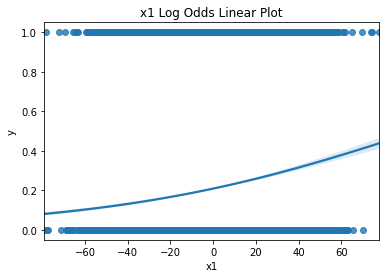

In [36]:
warnings.simplefilter('ignore')
x1 = sns.regplot(x= 'x1', y= 'y', data=train_corr_df, logistic= True).set_title("x1 Log Odds Linear Plot")

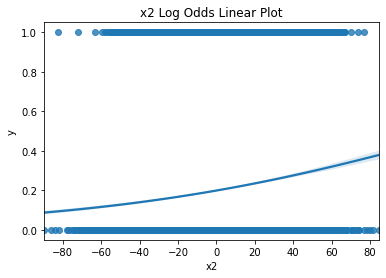

In [37]:
x2 = sns.regplot(x= 'x2', y= 'y', data=train_corr_df, logistic= True).set_title("x2 Log Odds Linear Plot")

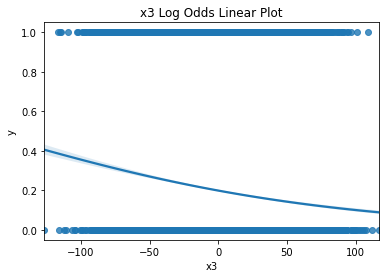

In [38]:
x3 = sns.regplot(x= 'x3', y= 'y', data=train_corr_df, logistic= True).set_title("x3 Log Odds Linear Plot")
warnings.simplefilter('always')

Now, that the assumption for Logistic Regression have been met. I'll run the model. First, I'll set up the training set with the regressors identified previously. Then, I'll transform the categorical variables into dummy variables using one-hot encoding.

In [39]:
train_model_df = train_df.copy()
train_model_df.drop(train_model_df.columns.difference(activeCol), 1, inplace=True)

test_model_df = train_df.copy()
test_model_df.drop(test_model_df.columns.difference(activeCol), 1, inplace=True)

one_hot = pd.get_dummies(train_model_df['x34'])
train_model_df = train_model_df.drop('x34',axis = 1)
train_model_df = train_model_df.join(one_hot)

one_hot = pd.get_dummies(train_model_df['x35'])
train_model_df = train_model_df.drop('x35',axis = 1)
train_model_df = train_model_df.join(one_hot)

one_hot = pd.get_dummies(train_model_df['x68'])
train_model_df = train_model_df.drop('x68',axis = 1)
train_model_df = train_model_df.join(one_hot)

one_hot = pd.get_dummies(train_model_df['x93'])
train_model_df = train_model_df.drop('x93',axis = 1)
train_model_df = train_model_df.join(one_hot)

one_hot = pd.get_dummies(test_model_df['x34'])
test_model_df = test_model_df.drop('x34',axis = 1)
test_model_df = test_model_df.join(one_hot)

one_hot = pd.get_dummies(test_model_df['x35'])
test_model_df = test_model_df.drop('x35',axis = 1)
test_model_df = test_model_df.join(one_hot)

one_hot = pd.get_dummies(test_model_df['x68'])
test_model_df = test_model_df.drop('x68',axis = 1)
test_model_df = test_model_df.join(one_hot)

one_hot = pd.get_dummies(test_model_df['x93'])
test_model_df = test_model_df.drop('x93',axis = 1)
test_model_df = test_model_df.join(one_hot)

X_train, y_train = train_model_df.iloc[:,:-1],train_model_df.iloc[:,-1]
X_test = test_model_df.iloc[:,:-1]

My intial model had trouble converging, so I standardized the data, and got an accuracy score of 0.89.

In [49]:
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_model = LogisticRegression(solver='lbfgs')
logreg_model.fit(X_train_scaled, y_train)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_model.score(X_train_scaled, y_train)))

Accuracy of logistic regression classifier on test set: 0.89


# Step 2b: XGBoost 

Next, I'll use Extreme Gradient Boosting (XGBoost), a highly regarded gradient boosted trees algorithm.

Since we have an imbalanced classification problem, I will be using a modified version of XGBoost called Class Weighted XGBoost which can provide better performance on binary classification problems with a severe class imbalance.

In [41]:
pd.set_option("display.max_rows", 20, "display.max_columns", None)

In [42]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

The training dataset contains 4 categorical regressors, so I'll encode them to make them useable in the model. 

In [43]:
train_XG_df = train_df.copy()
test_XG_df = test_df.copy()

train_XG_df['x34'] = pd.factorize(train_XG_df['x34'])[0] 
train_XG_df['x35'] = pd.factorize(train_XG_df['x35'])[0]
train_XG_df['x68'] = pd.factorize(train_XG_df['x68'])[0]
train_XG_df['x93'] = pd.factorize(train_XG_df['x93'])[0]

test_XG_df['x34'] = pd.factorize(test_XG_df['x34'])[0] 
test_XG_df['x35'] = pd.factorize(test_XG_df['x35'])[0]
test_XG_df['x68'] = pd.factorize(test_XG_df['x68'])[0]
test_XG_df['x93'] = pd.factorize(test_XG_df['x93'])[0]

Then, I'll divide the training dataset into regressors, X, and regressand, y

In [44]:
X_train, y_train = train_XG_df.iloc[:,:-1],train_XG_df.iloc[:,-1]
X_test = test_XG_df.copy()

Since we have an imbalanced classification problem, I found the imbalance ratio of approx 0.7965 / 0.2034 = 3.915

In [45]:
weight = (1-imbalance) / imbalance
weight

3.9152244795585656

Finally, I ran weighted XGBoost Classifier model using RepeatedStratifiedKFold for fitting. The ROC AUC scoring metric came out to 0.98527

In [50]:
XGB_model = XGBClassifier(scale_pos_weight=weight,objective='binary:logistic',eval_metric="logloss",use_label_encoder=False)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(XGB_model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.98527


In [53]:
XGB_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=3.9152244795585656, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

# Step 3: Generate Predictions

In [54]:
y_pred1 = logreg_model.predict_proba(X_test_scaled)
y_pred2 = XGB_model.predict_proba(X_test)

In [55]:
df1=pd.DataFrame(y_pred1, columns=['0','1']) 
df2=pd.DataFrame(y_pred2, columns=['0','1']) 

df1_1 = df1['1']
df1_2 = df1['1']

In [56]:
df1_1.to_csv(r'D:\results1.csv', index=False, header=False)
df1_2.to_csv (r'D:\results2.csv', index=False, header=False)

# Step 4: Compare Modeling Approaches

Logistic Regression works best when there is just one underlying decision boundary, while decision trees are better in spaces with many. Due to the complexity of the data, it's hard for me to have to a strong feeling about which model best suits the business problem. I very much trust and like XGBoost, but in this particular setting I expect Logistic Regression to also work well. XGBoost really provides value relative to other models when working with smaller datasets, but this dataset is large enough for Logistic Regression. Additionally, XGBoost is not particularly adept at providing class probabilities relative to logistic regression. Logistic Regression is faster and produces more interpretable results. Ultimately, I expect Logistic Regression to work better.
<br>
<br>
The only thing I would do differently when implementing this Logistic Regression in a business setting is spending more time on feature selection and engineering. In particular, my lack of domain knowledge may have left some inefficiencies in the model, and I'd also like to comb through the variables and remove any that aren't linearly related to the log odds.
<br>
<br>
To a business partner, I would explain that different models represent different technical approaches to solving problems. So, each model has strengths and weaknesses that make it perform better or worse with different data sets. Machine Learning models are trained on a subset of historical results, then their predictions are tested on a smaller subset of historical results. We can see that one model is better than another because we've actually witnessed it's performance on a dataset of the same makeup as the one in which we are predicting results.